<img src="https://i.ibb.co/TcVMz44/logo.jpg" alt="logo" border="0" width=200>

# Computational Astrophysics 2021
---
## Eduard Larrañaga

Observatorio Astronómico Nacional\
Facultad de Ciencias\
Universidad Nacional de Colombia


## Ordinary Differential Equations. Application 01. Motion of a Comet

### About this notebook

In this notebook we solve the equations of motion for a comet around the Sun using some integration methods.

`A. Garcia. Numerical Methods for Physics. (1999). Chapter 3 `

---

## A Comet-Sun System

In this application problem, we will describe the motion of a comet orbiting around the Sun. We will consider that the comet has a mass $m$ very small compared to Sun's mass $M$, i.e. $m \ll M$. This assumption implies that Sun will remain static as the comet orbits under the influence of its gravity. 

For example, the mass of Halley's comet is $m \approx 2.2 \times 10^{14}$ kg which is a very small quantity compared with Sun's mass $M \approx 1.9 \times 10^{30}$ kg.

---
The equations of motion of the comet, in cartesian coordinates with origin on the Sun's center, are

\begin{align}
\frac{d^2 x}{dt^2} = &- \frac{GM}{(x^2 + y^2)^{3/2}} x \\
\frac{d^2 y}{dt^2} = &- \frac{GM}{(x^2 + y^2)^{3/2}} y ,
\end{align}

where we restricted the problem to the $xy$-plane. In order to solve this ODEs system, we will transform it into a first-order differential system by introducing two new functions,

\begin{align}
\frac{d x}{dt} = &v^x \\
\frac{d y}{dt} = &v^y \\
\frac{dv^x}{dt} = &- \frac{GM}{(x^2 + y^2)^{3/2}} x \\
\frac{dv^y}{dt} = &- \frac{GM}{(x^2 + y^2)^{3/2}} y
\end{align}


An important consideration to take into account involves the big numbers involved in the problem such as the Sun's mass and the distances, which will be of the order of $1$ au. Hence, it is convenient to use a system of units with

- unit of mass: Solar mass
- units of distance: au
- units of time: years

Hence, the Newtonian gravitational constant will have the value $G = 4\pi^2$,

In [1]:
path=''

In [2]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/Colab Notebooks/CA2021/20. The 2-Body Problem /presentation/'

import sys 
sys.path.append(path) # Append the path of the local modules

Mounted at /content/drive


The ODEs system is implemented by defining the function 

In [3]:
import numpy as np

# Newtonian Gravitational Constant
G = 4.*np.pi**2
M = 1.

def f(t0, q0):
    '''
    ------------------------------------------
    f(t0, q0) 
    ------------------------------------------
    ODEs system for the motion of a comet 
    around the Sun using cartesian coordinates
    in the orbital plane.
    ------------------------------------------
    Arguments:
    t0: initial time
    q0: numpy array with the initial condition
        data:
        q0[0] = x
        q0[1] = y
        q0[2] = dx/dt
        q0[3] = dy/dt
    ------------------------------------------
    '''
    x = q0[0]
    y = q0[1]
    vx = q0[2]
    vy = q0[3]
    f = np.zeros(4)
    f[0] = vx
    f[1] = vy
    f[2] = - G*M*x/(x**2 + y**2)**(3/2)
    f[3] = - G*M*y/(x**2 + y**2)**(3/2)
    return f


--- 
## Initial Condition

Choosing the initial condition may be a tricky issue when solving a ODEs system. In the case of the two-body system, an interesting way to choose the initial condition comes from the conserved quantities.

Hence, in the problem of the motion of a comet around the sun, we will use the total energy $E$ and the total angular momentum $l$, defined as

\begin{equation}
E = \frac{1}{2} m \left[ (v^x)^2 + (v^y)^2\right] - \frac{GMm}{r} 
\end{equation}

and

\begin{equation}
\vec{l} = \vec{r} \times \vec{p} = m \vec{r} \times \vec{v}.
\end{equation}

Considering that the motion occurs in the $x-y$ plane and using cartesian coordinates, we have

\begin{equation}
l = x p^y - y p^x = m(x v^y - y v^x).
\end{equation}

\subsection*{Effective Potential}

Another important quantity to take into account is the effective potential,

\begin{equation}
V_{\text{eff}} (r) =  \frac{l^2}{2m^2r^2} - \frac{GM}{r}.
\end{equation}




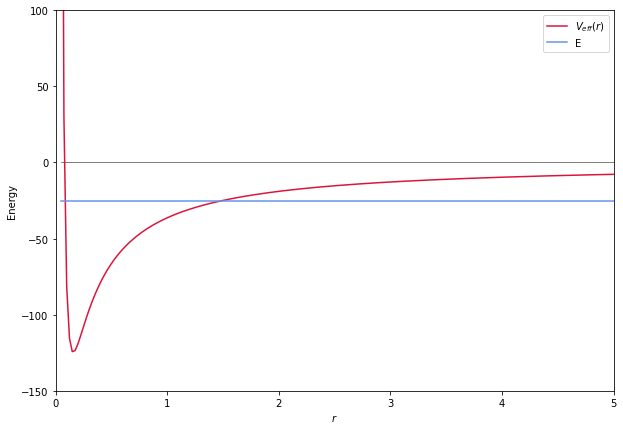

In [ ]:
import matplotlib.pyplot as plt

def eff_potential(r, h, M=1.):
  return (h**2)/(2*r**2) - G/r

r = np.linspace(0.05,5.,200) 
plt.figure(figsize=(10,7))
plt.plot(r,np.zeros(len(r)),'k',linewidth=0.5)
plt.plot(r, eff_potential(r,h=2.5), color='crimson', label= r'$V_{eff}(r)$')
plt.plot(r,-25*np.ones(len(r)),color='cornflowerblue',linewidth=1.5, label='E')

plt.xlabel(r'$r$')
plt.ylabel(r'Energy')
plt.ylim(-150,100)
plt.xlim(0,5)
plt.legend()
plt.show()


### Condition for Bound Motion (Elliptic or circular trajectories)

From the above relations, it is possible to impose some conditions to obtain the desired motion for the comet. First, we must remember that bound trajectories are possible, for a given value of $l$, if  the energy is negative, i.e. $E< 0$. This impose the relation
\begin{equation}
\frac{E}{m} = \frac{1}{2} \left[(v^x)^2 + (v^y)^2\right] - \frac{GM}{r} < 0
\end{equation}
\begin{equation}
\left[(v^x)^2 + (v^y)^2\right]< \frac{2GM}{r}.
\end{equation}

Second, the total energy must be greater (or equal) than the effective potential in order to have motion, i.e.
\begin{align}
\frac{E}{m} \geq &V_{\text{eff}} (r) \\
\frac{1}{2} \left[(v^x)^2 + (v^y)^2\right] - \frac{GM}{r}  \geq &\frac{l^2}{2m^2 r^2} - \frac{GM}{r}\\
\left[(v^x)^2 + (v^y)^2\right]  \geq &\frac{(x v^y - y v^x)^2}{ r^2}
\end{align}

### Choosing the Initial Condition

Using $G= 4 \pi^2$ and $M = 1 M_{\odot}$, the above conditions become
\begin{equation}
    \begin{cases}
    \left[(v^x)^2 + (v^y)^2\right]< &\frac{8\pi^2}{r} \\
    \left[(v^x)^2 + (v^y)^2\right]  \geq &\frac{(x v^y - y v^x)^2}{ r^2}
    \end{cases}
\end{equation}


Now we can choose, for example, that at $t=0$, the coordinates of the comet are $x = 1 \text{ au}$  and $y=0 \text{ au}$. Then, we obtain 
\begin{equation}
    \begin{cases}
    (v^x)^2 + (v^y)^2&<  8\pi^2 \\
    (v^x)^2 &\geq  0.
    \end{cases}
\end{equation}

The equal sign in the second condition corresponds either to a circular orbit (if it is located at the minimum of the effective potential) or to the location of a returning point (apsis). Therefore, assuming that the initial condition corresponds to an apsis, we have $v^x = 0$ and we are left with just one condition for the other component of the velocity,
\begin{equation}
    v^y < 2\sqrt{2}\pi \approx  8.885766 \frac{\text{au}}{\text{yr}}.
\end{equation}

Summarizing all these results, in order to obtain a bound orbit in the problem of motion of the comet around the Sun, we may impose the particular initial condition
\begin{equation}
    \begin{cases}
    x_0 = & 1\text{ au}\\
    y_0 = & 0 \\
    v^x = & 0 \\
    v^y = & 3\frac{\text{au}}{\text{yr}}.
    \end{cases}
\end{equation}

The time grid to apply the integration method will be defined from $t_0 = 0$ to $t_f = 20$ years. 

## Soving the ODEs System

Using the Forward Euler and the RK4 algorithms to solve the differential problem, we obtain

In [4]:
from RK4 import *

def FEuler(f, h, t0, q0):
    '''
    ------------------------------------------
    FEuler(f, h, t0, h0)
    ------------------------------------------
    Forward Euler's method for solving a ODEs 
    system.
    ------------------------------------------
    Arguments:
    f : Function with the RHS of the ODEs
    h : stepsize for the iteration
    t0: initial time
    q0: NumPy array with the initial values of
        the functions in the ODEs system
    ------------------------------------------
    '''
    q1 = q0 + h*f(t0, q0)
    return q1



# Creation of the time grid (in years)
t_0 = 0.
t_f = 20.

# Number of steps in the grid
n = 100000

# Constant stepsize defined by the number of steps in the grid
h = (t_f - t_0)/n

# Arrays to store the solution
t = np.linspace(t_0, t_f, n) # Time information
QE = np.zeros([n,4]) # Euler's Method information
QR = np.zeros([n,4]) # RK4's Method information

# Initial Conditions
QE[0,0] = 1.
QE[0,1] = 0.
QE[0,2] = 0.
QE[0,3] = 3.

QR[0,0] = 1.
QR[0,1] = 0.
QR[0,2] = 0.
QR[0,3] = 3.
             
# Main loops for solving the problem
for i in range(1,n):
    q0 = QE[i-1]
    QE[i] = FEuler(f, h, 0, q0)

for i in range(1,n):
    q0 = QR[i-1]
    QR[i] = RK4(f, h, 0, q0)


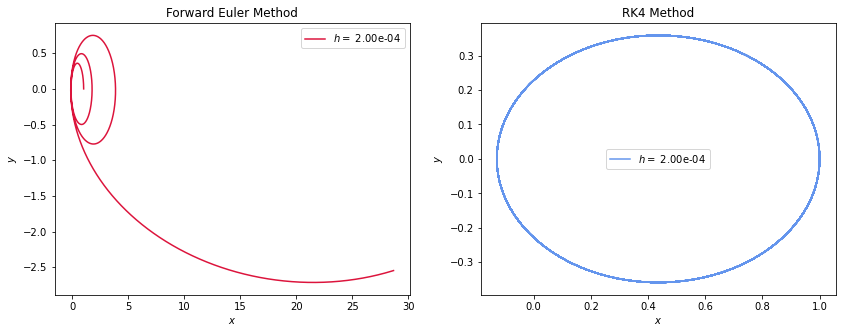

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,2, figsize=(14,5))
ax[0].plot(QE[:,0], QE[:,1], color='crimson', label=f'$h=$ {h:.2e}')
ax[0].set_title('Forward Euler Method')
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].legend()

ax[1].plot(QR[:,0], QR[:,1], color='cornflowerblue', label=f'$h=$ {h:.2e}')
ax[1].set_title('RK4 Method')
ax[1].set_xlabel(r'$x$')
ax[1].set_ylabel(r'$y$')
ax[1].legend()
plt.show()

It is clear that, while the RK4 has a good behavior, the forward Euler's method is unstable with the chosen parameters. With a smaller value of the stepsize, the behavior of the Euler's method solution is improved,

In [ ]:
# Creation of the time grid (in years)
t_0 = 0.
t_f = 5.

# Number of steps in the grid (1 millon points!)
nI = 1000000

# Constant stepsize defined by the number of steps in the grid
hI = (t_f - t_0)/nI

# Arrays to store the solution
tI = np.linspace(t_0, t_f, nI) # Time information
QEI = np.zeros([nI,4]) # Euler's Method information

# Initial Conditions
QEI[0,0] = 1.
QEI[0,1] = 0.
QEI[0,2] = 0.
QEI[0,3] = 3.
             
# Main loops for solving the problem
for i in range(1,nI):
    q0 = QEI[i-1]
    QEI[i] = FEuler(f, hI, 0, q0)


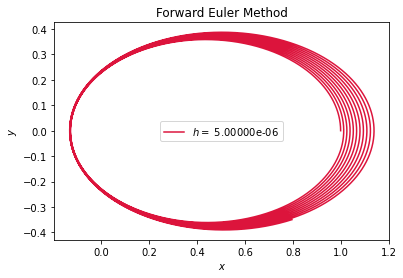

In [ ]:
fig, ax = plt.subplots()
ax.plot(QEI[:,0], QEI[:,1], color='crimson', label=f'$h=$ {hI:.5e}')
ax.set_title('Forward Euler Method')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.legend()

plt.show()

---

The bad behavior for the forward Euler's method can be appreciated by calculating the conserved quantities of the problem (in this case energy and angular momentum). A plot is useful to show this behavior:

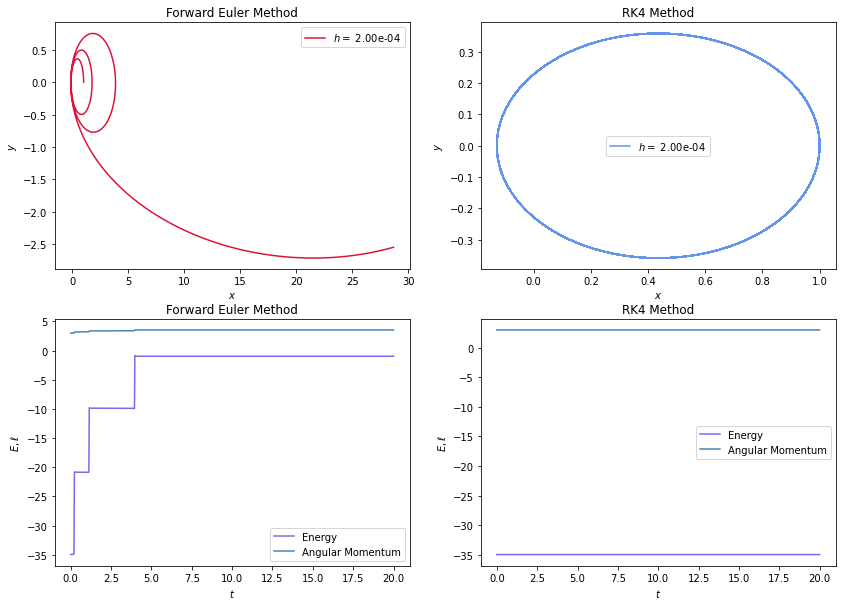

In [ ]:
EnergyE = np.zeros(n)
AngMomE = np.zeros(n)

EnergyR = np.zeros(n)
AngMomR = np.zeros(n)

for i in range(n):
    speed2 = QE[i,2]**2 + QE[i,3]**2
    r = np.sqrt(QE[i,0]**2 + QE[i,1]**2)
    EnergyE[i] = speed2/2 - G*M/r
    AngMomE[i] = QE[i,0]*QE[i,3] - QE[i,1]*QE[i,2]

for i in range(n):
    speed2 = QR[i,2]**2 + QR[i,3]**2
    r = np.sqrt(QR[i,0]**2 + QR[i,1]**2)
    EnergyR[i] = speed2/2 - G*M/r
    AngMomR[i] = QR[i,0]*QR[i,3] - QR[i,1]*QR[i,2]


fig, ax = plt.subplots(2,2, figsize=(14,10))
ax[0,0].plot(QE[:,0], QE[:,1], color='crimson', label=f'$h=$ {h:.2e}')
ax[0,0].set_title('Forward Euler Method')
ax[0,0].set_xlabel(r'$x$')
ax[0,0].set_ylabel(r'$y$')
ax[0,0].legend()

ax[0,1].plot(QR[:,0], QR[:,1], color='cornflowerblue', label=f'$h=$ {h:.2e}')
ax[0,1].set_title('RK4 Method')
ax[0,1].set_xlabel(r'$x$')
ax[0,1].set_ylabel(r'$y$')
ax[0,1].legend()

ax[1,0].plot(t, EnergyE, color='mediumslateblue', label=f'Energy')
ax[1,0].plot(t, AngMomE, color='steelblue', label=f'Angular Momentum')
ax[1,0].set_title('Forward Euler Method')
ax[1,0].set_xlabel(r'$t$')
ax[1,0].set_ylabel(r'$E, \ell$')
ax[1,0].legend()

ax[1,1].plot(t, EnergyR, color='mediumslateblue', label=f'Energy')
ax[1,1].plot(t, AngMomR, color='steelblue', label=f'Angular Momentum')
ax[1,1].set_title('RK4 Method')
ax[1,1].set_xlabel(r'$t$')
ax[1,1].set_ylabel(r'$E, \ell$')
ax[1,1].legend()

plt.show()

These plots show clearly that the forward Euler's method with a not-so-small setpsize does not satisfies the conservation of energy (and produces a small increase in the angular momentum), while the RK4 do have a very good behavior.

In [ ]:
print('The change in energy for Euler\'s method is :', np.abs(EnergyE[n-1] - EnergyE[0]))
print('\nThe change in energy for RK4 method is :', np.abs(EnergyR[n-1] - EnergyR[0]))

The change in energy for Euler's method is : 34.01224429334252

The change in energy for RK4 method is : 1.1176754711073045e-05


Now we will concentrate in the RK4 algorithm. Using a grid with $100000$ the computation time is

In [ ]:
from RK4 import *


# Creation of the time grid (in years)
t_0 = 0.
t_f = 20.

# Number of steps in the grid
n = 100000

# Constant stepsize defined by the number of steps in the grid
h = (t_f - t_0)/n

# Arrays to store the solution
t = np.linspace(t_0, t_f, n) # Time information
Q = np.zeros([n,4]) # RK4's Method information

# Initial Conditions
Q[0,0] = 1.
Q[0,1] = 0.
Q[0,2] = 0.
Q[0,3] = 3.

# Computation time
import time
start = time.time()

# Main loops for solving the problem
for i in range(1,n):
    q0 = Q[i-1]
    Q[i] = RK4(f, h, 0, q0)

end = time.time()
print('The elapsed time was:', end - start)

The elapsed time was: 5.571051597595215


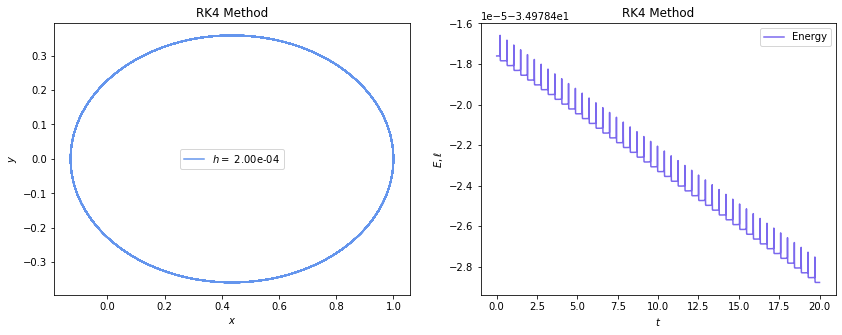

In [ ]:
Energy = np.zeros(n)
AngMom = np.zeros(n)

for i in range(n):
    speed2 = Q[i,2]**2 + Q[i,3]**2
    r = np.sqrt(Q[i,0]**2 + Q[i,1]**2)
    Energy[i] = speed2/2 - G*M/r
    AngMom[i] = Q[i,0]*Q[i,3] - Q[i,1]*Q[i,2]


fig, ax = plt.subplots(1,2, figsize=(14,5))

ax[0].plot(Q[:,0], Q[:,1], color='cornflowerblue', label=f'$h=$ {h:.2e}')
ax[0].set_title('RK4 Method')
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].legend()

ax[1].plot(t, Energy, color='mediumslateblue', label=f'Energy')
ax[1].plot(t, AngMom, color='steelblue', label=f'Angular Momentum')
ax[1].set_title('RK4 Method')
ax[1].set_xlabel(r'$t$')
ax[1].set_ylabel(r'$E, \ell$')
ax[1].legend()

plt.show()

Note that the energy is not a constant, but shows a small continuos change that may accumulate to an important value over long intervals of time. For this time interval, the difference between final and initial values of energy is 

In [ ]:
np.abs(Energy[n-1]- Energy[0])

1.1176754711073045e-05

## Adaptative Rung-Kutta

In order to improve the solution, giving a smaller change in the energy of the system, we will implement an adaptative RK algorithm. This method will change the stepsize according to a given error tolerance. 

In [ ]:
from AdaptativeRK import *


# Creation of the time grid (in years)
t_0 = 0.
t_f = 20.

# Initial stepsize (we took the value used in the RK4 method above)
h = 1E-4

# Arrays to store the solution
t = np.zeros(1) # Time information
Q = np.zeros([1,4]) # RK4's Method information

# Initial Conditions
t[0] = t_0
Q[0,0] = 1.
Q[0,1] = 0.
Q[0,2] = 0.
Q[0,3] = 3.

# Computation time
import time
start = time.time()

# Counter to display the advance in calculations
Tpercentage = 0.1

# Main loops for solving the problem
i = 1
while t[len(t)-1]<t_f:
    q0 = Q[i-1]
    h, qf = ARK(f, h, 0., q0)
    qq = np.array([qf]) # This is defined to append it correctly to the aray Q
    Q = np.append(Q, qq, axis=0)
    t = np.append(t, t[i-1]+ h)
    if t[i]>(t_f*Tpercentage): 
        print(f'{Tpercentage*100:.1f} % completed')
        Tpercentage +=0.1
    i=i+1
    
end = time.time()
print('The elapsed time was:', end - start)

10.0 % completed
20.0 % completed
30.0 % completed
40.0 % completed
50.0 % completed
60.0 % completed
70.0 % completed
80.0 % completed
90.0 % completed
100.0 % completed
The elapsed time was: 426.94131994247437


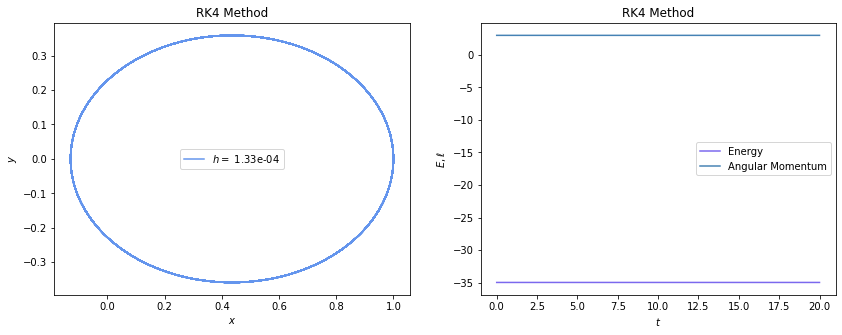

In [ ]:
n = len(t)
Energy = np.zeros(n)
AngMom = np.zeros(n)

for i in range(n):
    speed2 = Q[i,2]**2 + Q[i,3]**2
    r = np.sqrt(Q[i,0]**2 + Q[i,1]**2)
    Energy[i] = speed2/2 - G*M/r
    AngMom[i] = Q[i,0]*Q[i,3] - Q[i,1]*Q[i,2]

    
fig, ax = plt.subplots(1,2, figsize=(14,5))

ax[0].plot(Q[:,0], Q[:,1], color='cornflowerblue', label=f'$h=$ {h:.2e}')
ax[0].set_title('RK4 Method')
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].legend()

ax[1].plot(t, Energy, color='mediumslateblue', label=f'Energy')
ax[1].plot(t, AngMom, color='steelblue', label=f'Angular Momentum')
ax[1].set_title('RK4 Method')
ax[1].set_xlabel(r'$t$')
ax[1].set_ylabel(r'$E, \ell$')
ax[1].legend()

plt.show()

In [ ]:
np.abs(Energy[n-1] - Energy[0])

3.2153840123783084e-06

Note that the conservation of energy is improved but the computation time increases considerably.

The RK4 algorithm evaluates $100000$ grid points in $5.71$ s., with change in the energy of $1.12\times 10^{-05}$.

The adaptive RK algorithm, using the error tolerance $\epsilon = 1\times 10^{-11}$ and a fudge factor $S=0.999$, evaluated $326089$ points with a variation of the energy between the initial and final values of $3.22\times 10^{-6}$. However, the computation time increased to $935.43$ s. or approximately $15.6$ minutes. 

